# Practical 5 

## Integrals

In this workgroup we will learn how to solve integrals both analytically using math formulas and numerically using Python. 

The integral of a function $f(x)$ is definied as the limit of the total areas of a set of rectangles that have base length equal to $\Delta x = x_{n-1} - x_n$ and height equal to the value of the function at $f(x_n)$. We can write this definition as follows: 
$$
\int_a^b f(x) \text{d}x = \lim_{N \rightarrow \infty} \sum_{n=0}^{N-1} \Delta x f(x_n) = \lim_{N \rightarrow \infty} \sum_{n=0}^{N-1} \left(\frac{b - a}{N}\right)  f\!\left(a + n \frac{b - a}{N} \right)
$$
where $x_n = a + n \Delta x$ and $\Delta x = x_{n+1} - x_n = (b - a)/N$


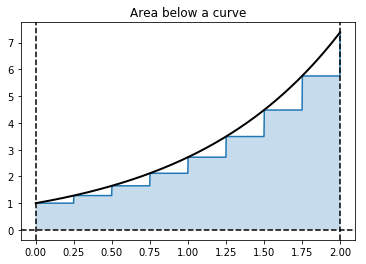

## Solved exercise 1
Use the definition of integral to compute the integral of $x$ from $0$ to $1$.

### Solution
We start by writing down the definition:
$$
\int_0^1 x \text{d}x = \lim_{N \rightarrow \infty} \sum_{n=0}^{N-1} \left(\frac{1 - 0}{N}\right) {\!\left(0 + n \frac{1 - 0}{N} \right)} 
$$
Using the distributive rule of multiplication (ca + cb = c(a + b)), we can now move out of the sum everything that does not depend on the index $n$:
$$
\lim_{N \rightarrow \infty} \sum_{n=0}^{N-1} \left(\frac{1}{N}\right) {\!\left(n \frac{1}{N} \right)} = \lim_{N \rightarrow \infty} \frac{1}{N^2} \sum_{n=0}^{N-1}  n
$$
In order to compute the limit, we need to study how the cumulative sum: 
$$
S_1(n) = \sum_{n=0}^{N-1} n = 0 + 1 + 2 + \dots + (N-2) + (N-1)
$$ 
behaves for $N$ tending to infinity. First of all, notice that the sum $S_1(N)$ is equal to the reversed sum $S_r(n)$:
$$
S_1(n) = S_r(n) = (N-1) + (N-2) + \dots + 2 + 1 + 0
$$ 
Therefore:
$$
2 S_1(N) = S_1(N) + S_r(N)~.
$$
We can now sum these two sequences elementwise:
$$
S_1(N) + S_r(N) = (0 + N) + (1 + N - 1) + \dots + (N-1 + 1) + (N + 0)
$$
$$
= N \times N~.
$$
We can therefore conclude that:
$$
2 S_1(N) = N^2
$$
and
$$
S_1(N) = \frac{N^2}{2}~.
$$

We can now use this formula to compute the limit in the definition of integral:

$$
\int_0^1 x \text{d}x = \lim_{N \rightarrow \infty} \frac{1}{N^2} \sum_{n=1}^N  n = \lim_{N \rightarrow \infty} \frac{S_1(n)}{N^2}  = \lim_{N \rightarrow \infty} \frac{N^2}{2 N^2} = \frac{1}{2}~.
$$

As you can see, it takes a lot of work to compute integrals of even the simplest functions using the definition alone. We will therefore introduce a very powerful technique based on differentials and the foundamental theorem of calculus.

## Python exercise 1

Integrals can be easily approximated  numerically using a language like Python. You simply need to evaliate the sum in the definition for a finite value of $N$ (number of approximating rectangles).

### Part 1 (Solved)
Write a Python program to approximate the following integral using 20 rectangles.

$$
\int_0^1 \cos(x)^2 \text{d} x
$$

### Solution
We start by defining all the relevant variables and function:

In [ ]:
import numpy as np

N = 20 #Number of rectangles
a = 0 # Lower bound
b = 1 # Upper bound
f = lambda x: np.cos(x)**2 #Function to integrate
dx = (b - a)/N # The base of each rectangle is equal to the total imntegration range divided by the number of rectangles.
x_range = np.linspace(0,1,N) #Initial x coordinate x_n of each rectangle

We can now write the code for approximating the integral. We just need to sum all the areas of the rectangles with base $dx$ and height $f(x_n)$.

In [ ]:
result = sum([dx*f(x) for x in x_range])
print("The approximate value of the integral is: {}".format(result))

The approximate value of the integral is: 0.7230568592491065


### Part 2
You can now use this code to see how the approximation improves as we increase the number of rectangles. Plot the resulting approximation for as a function of the number N of rectangles from 2 to 30. 

The correct number value is 0.72732...

### Part 3
Use Python to approximate the integrals of the following functions from 0 to 1 using 20 rectangles.

- $f(x) = x + x^2$
- $f(x) = \cos(x) e^x$
- $f(x) = \sin(x)^3 + 4x^2$


## Differentials
Differentials are mathematical objects that represent infinitesimally small variations in the values of a function. 
Differentials follow the following properties:

#### Additivity
$$
\text{d}(f(x) + g(x)) = \text{d}f(x) + \text{d}g(x)
$$

#### Product rule
$$
\text{d}(f(x) g(x)) = g(x) \text{d}f(x) + f(x) \text{d}g(x)
$$

#### Chain rule
Given two functions $u(x)$ and $f(u)$ and their composition:
$$
\text{d}f(u(x)) = \frac{\text{d}f(u(x))}{\text{d} u(x)}du(x)
$$
where $\frac{\text{d}f(u(x))}{\text{d} u(x)}$ is simply the derivative $f'(u)$ evaluated at $u = u(x)$. Using this rule with $u(x) = x$, we obtain one of the most important formulas of the course:

$$
\text{d} f(x) = \frac{\text{d} f(x)}{\text{d} x} dx
$$

## Solved exercise 2
Compute the differentials of the following function:

$f(x) = \log{(x)}$

### Solution
the derivative of $\log(x)$ is $1/|x|$. Therefore, using the formulawe can write:
$$
\text{d}f(x) = \text{d}\log(x) = \frac{1}{|x|} dx
$$ 

## Exercises 2
Compute the following differentials:
- $f(x) = \frac{1}{1 + x^2}$
- $f(x) = 5x^3 + \sin(x)$
- $f(x) = e^{x^2}$

### Solutions
- $\text{d}\left(\frac{1}{1 + x^2}\right) = -\frac{2 x}{(1 + x^2)^2} \text{d} x$
- $\text{d}\left(5x^3 + \sin(x)\right) = 15 x^2 \text{d} x + \cos(x) \text{d} x$
- $\text{d} e^{x^2} = 2 x e^{x^2} \text{d}x$

## Integrals with respect to differentials

Differentials are objects that can be integrated. The regular integrals that we discussed above are taken with respect to the differential $\text{d} x$ of the identity function (f(x) = x). In general, the integral of a function $f(x)$ with respect to the differential $\text{d} g(x)$ is defined as follows:

\begin{align}
\int_a^b f(x) \text{d} g(x) &= \lim_{N \rightarrow \infty} \sum_{n=0}^{N-1} f(x_n) \left( g(x_{n+1}) - g(x_n) \right) \\
&= \lim_{N \rightarrow \infty} \sum_{n=0}^{N-1} f(x_n) \left( g(x_{n} + \Delta x) - g(x_n) \right)\\
&= \lim_{N \rightarrow \infty} \sum_{n=0}^{N-1} f(x_n) \Delta g(x_n)
\end{align}

In this formula, you can see that the differential $\text{d} g(x)$ is an "infinitesimal generator" of the finite differences $\Delta g(x_n) = g(x_n + \Delta x) - g(g_n)$.

## Python exercise 2
Use python to approximate the following integrals with respect to differentials using $N = 20$.

$$
\int_a^b x^2 \text{d}\sin(x)
$$

hint: You need to modify the code used for approximating regular integrals. Specificly, you need to replace $dx$ with $\Delta g(x_n)$.

## Exercise 3
You can use the formula $\text{d} f(x) = \text{d} x$ to convert integrals with respect to differentials into regular integrals. For example:

$$
\int_a^b x \text{d}\sin(x) = \int_a^b x \frac{\text{d} \sin(x)}{\text{d}x} \text{d}x = \int_a^b x \cos(x) \text{d} x~.
$$

Convert the following integrals with respect to differentials into regular integrals:

- $\int_0^1 \cos(x) \text{d} x^4$

- $\int_{-1}^1 e^x \text{d} e^x$

- $\int_0^1 x^2 \text{d} \left(1 + 2x^2 - x^4 \right)$

### Solutions
- $4 \int_0^1 \cos(x) x^3 \text{d} x$
- $\int_{-1}^1 e^{2x} \text{d}x$
- $\int_0^1 \left(4 x^3 - 4 x^5 \right) \text{d}x$

## Foundamental theorem of calculus

As we saw in the beginning of this practical, solving integrals using the definition is extremely hard. We will now introduce the most important tool for solving integrals: the foundamental theorem of calculus!

We can start by proving the following formula:
$$
\int_a^b \text{d} f(x) = f(b) - f(a)
$$
This is quite easy since most of the terms in the sum cancel out exactly:
\begin{align}
\int_a^b \text{d} f(x) &= \lim_{N \rightarrow \infty} \sum_{n=0}^{N-1} \left(f(x_n + \Delta x) - f(x_n)\right) \\
&= \lim_{N \rightarrow \infty} \left(\sum_{n=0}^{N-1} f(x_n + \Delta x) - \sum_{n=0}^{N-1} f(x_n) \right)\\
&= \lim_{N \rightarrow \infty} \left(\sum_{n=1}^{N-1} f(x_{n+1}) - \sum_{n=1}^N f(x_n) \right)\\
&= \lim_{N \rightarrow \infty} \left(\sum_{n=1}^{N} f(x_{n}) - \sum_{n=0}^{N-1} f(x_n) \right)\\
&= \lim_{N \rightarrow \infty} \left(f(b) + \left(\sum_{n=1}^{N-1} f(x_{n}) - \sum_{n=1}^{N-1} f(x_n) \right) - f(a) \right)\\
&= f(b) - f(a)
\end{align}

We can now use this result together with the formula $\text{d}F(x) = \frac{\text{d}F(x)}{\text{d}x} \text{d} x$:
$$
\int_a^b \frac{\text{d} F(x)}{\text{d} x} \text{d}x = F(b) - F(a)
$$ 
This result is known as the foundamental theorem of caclulus and its importance can hardly be overstated. Using this theorem, we can solve a large class of integrals by finding anti-derivatives.

## Solved exercise 3
use the foundamental theorem of caclulus to compute the following integral:

$$
\int_{1}^{3} 2 x^3 \text{d}x
$$

### Solution
We need to find a function $F(x)$ such that $\frac{\text{d}F(x)}{\text{d} x} = 2 x^3$ (i.e. an anti-derivative).

We know that the derivitive of the power function $x^k$ is $k x^{k-1}$. Therefore, it is easy to see that an anti-derivative of a power function $x^p$ is
$$
F(x) = \frac{1}{p+1}x^{p+1}~.
$$
In fact:
$$
\frac{\text{d}F(x)}{\text{d} x} = \frac{1}{p+1} \frac{\text{d}x^{p+1}}{\text{d} x} = \frac{p+1}{p+1} x^p = x^p~.
$$
In our case, we can use this formula to find the anti-derivative:
$$
F(x) = \frac{2}{4} x^4~.
$$
Therefore:
$$
\int_{1}^{3} 2 x^3 \text{d}x = \int_{1}^{3} \text{d}\left( \frac{2}{4} x^4 \right) = \frac{2}{4} 3^4 - \frac{2}{4} 1^4 = \frac{1}{2}(3^4-1)
$$

## Exercises 3
Solve the following integrals using the foundamental theorem:

- $\int_0^1 5 x^5 \text{d}x$
- $\int_0^1 (4 + 3x - 4x^7) \text{d}x$
- $ \int_{-1}^{1} (3e^x + 4x^4) \text{d} x$
- $ \int_{-\pi/2}^{\pi/2} (\cos(x) + 3x) \text{d} x$
- $ \int_0^2 x^3 \text{d} x^2 $
- $ \int_1^2 \frac{1}{x} \text{d} x$
- $ \int_1^2 \frac{1}{x^2} \text{d} x$
- $ \int_1^3 \frac{x + 2}{x^2} \text{d} x$

### Solutions
- $\frac{5}{6}$
- $ 5 $
- $ 3 (e - e^{-1}) + \frac{8}{5}$
- $ 2 $
- $ \frac{2^6}{5} $
- $ \log(2) $
- $ 1/2 $
- $ 4/3 + \log(3) $

## Solved exercise 4
You don't always need to transform integrals with respect to differentials into regular integrals. It is often easier to keep them as they are. For example, the integral

$$
\int_0^1 x^2 \text{d} x^2
$$

can be solved by introducing the new variable $y(x) = x^2$. Replacing this in the formula, we get

$$
\int_0^2 x^2 \text{d} x^2 = \int_0^2 y(x) \text{d} y(x) = \int_0^2 \frac{1}{2} \text{d}  y(x)^2 = \frac{1}{2} \left(y(1)^2 - y(0)^2 \right) = \frac{1}{2} \left(y(2)^2 - y(0)^2 \right) = \frac{2^4}{2} = 2^3
$$

where we used the formula $\text{d} y(x)^2 = 2 y(x) \text{d} y(x)$.

### Exercises 4
Solve the following integrals:
- $\int_0^1 e^{x^2} \text{d}x^2$
- $\int_0^1 e^{2x} \text{d} e^x$
- $\int_{-1}^1 \left(\cos(x^2) + x^4 \right) \text{d}x^2$

#### Solutions
- $e - 1$
- $\frac{1}{3}(e^3 - 1)$
- $ 0 $
